# Overfitting vs Underfitting – Visual Demo

In this notebook, we demonstrate how different model complexities affect performance.

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create a synthetic binary classification dataset
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


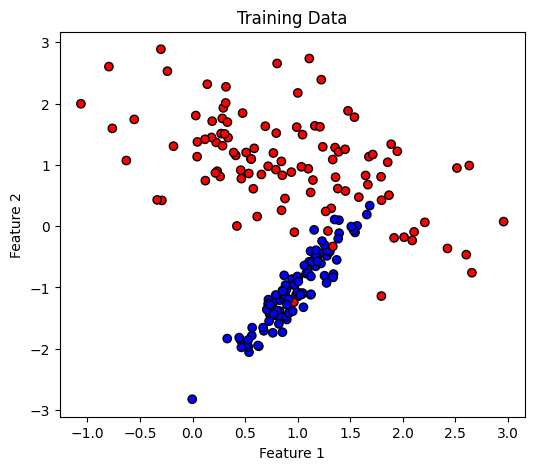

In [11]:
# Visualize the data
plt.figure(figsize=(6, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k')
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Underfitting model (very shallow)
clf_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
clf_underfit.fit(X_train, y_train)

# Overfitting model (deep tree)
clf_overfit = DecisionTreeClassifier(max_depth=20, random_state=42)
clf_overfit.fit(X_train, y_train)

# Accuracy
print("Underfit - Train Acc:", accuracy_score(y_train, clf_underfit.predict(X_train)))
print("Underfit - Test Acc:", accuracy_score(y_test, clf_underfit.predict(X_test)))
print()
print("Overfit - Train Acc:", accuracy_score(y_train, clf_overfit.predict(X_train)))
print("Overfit - Test Acc:", accuracy_score(y_test, clf_overfit.predict(X_test)))

Underfit - Train Acc: 0.919047619047619
Underfit - Test Acc: 0.9222222222222223

Overfit - Train Acc: 1.0
Overfit - Test Acc: 0.9111111111111111


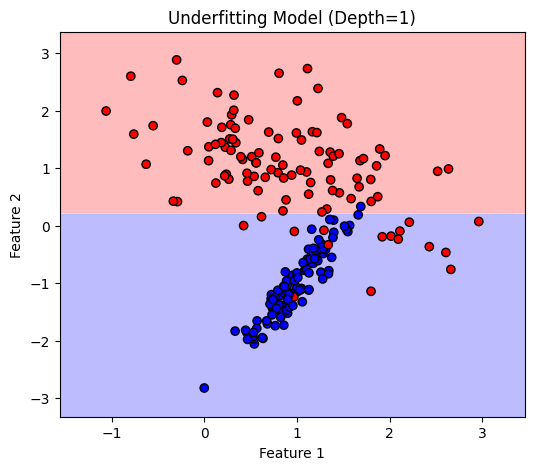

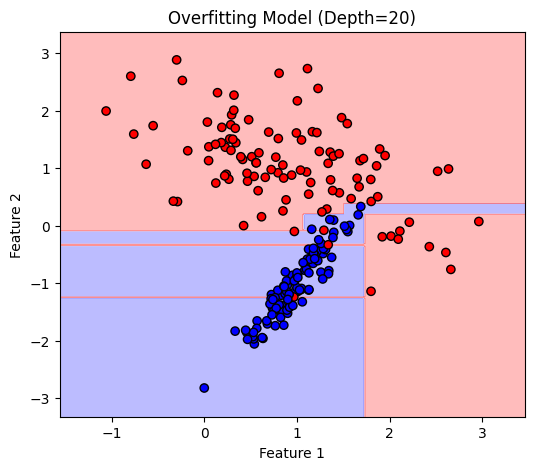

In [13]:
import numpy as np

def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries
plot_decision_boundary(clf_underfit, X_train, y_train, "Underfitting Model (Depth=1)")
plot_decision_boundary(clf_overfit, X_train, y_train, "Overfitting Model (Depth=20)")
